<a href="https://colab.research.google.com/github/iaagulo/Machine-Learning-Basics/blob/main/Ch02_MultivariateLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2.0 Gradient Descent**

##**2.5 Functions to be used for this chapter**

This function computes for the cost function, $J(\theta_0,\theta_1,...,\theta_n)$ with $x$, $y$, and $\theta$ as input variables and $Jcost$ as the output variable.

In [2]:
def costfunction(x,y,theta):
  m = len(y)
  Jcost = (1/(2*m))*np.sum(np.power((np.dot(x,theta)-y.reshape(m,1)),2))
  return Jcost

This function computes for the new values of the parameter $\theta$ using the gradient descent method.

In [3]:
def gradient_descent(x,y,theta,a,epoch):
  J = np.zeros(epochs,dtype=float)
  m = len(y)
  for k in range(epoch):
    grad_theta = (1/m)*np.dot(np.transpose(x),((np.dot(x,theta)-y.reshape(m,1))))
    theta = theta - a*grad_theta
    J[k] = costfunction(x,y,theta)
  return grad_theta,J

This function rescales the elements of the data set.

In [4]:
def FeatureScale(X):
  Xmin = np.mean(X)
  Xstd = np.std(X)
  Xfeat = (X - Xmin)/Xstd
  return Xfeat

##**2.4 Multivariate Linear Regression**

####**2.4.1 Importing the modules**

We first import the necessary modules.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import linear_model

####**2.4.2 Importing the Data**

The data that we need is stored in the Google Drive. So, we need to allow Google Colab to access the data.

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [7]:
ls

gdrive/  sample_data/


In [8]:
cd gdrive/MyDrive/'Colab Notebooks'/Book

/content/gdrive/MyDrive/Colab Notebooks/Book


In [9]:
ls

carbig.csv                            Ch02_MultivariateLR.ipynb
Ch01_Intro_to_Machine_Learning.ipynb  PCT01.ipynb
Ch02_Gradient_Descent.ipynb           PCT01_Solution.ipynb


####**2.4.3 Removal of non-numerical elements**

We now read the data using the pandas module.

In [10]:
 data = pd.read_csv('carbig.csv', index_col=None)

The data shown describes how the miles per gallon (MPG) relates to the various characteristics of a car, such as the number of cylinders, the displacement (cubic in.), the horsepower, the weight (lbs.), and the acceleration (from 0 to 60 mph in seconds). Thus, each of these characteristics are the independent variable and the MPG is the dependent variable. We now have a data set with multiple features, and these five features dictate how the car performance in terms of MPG is.<br>
This command displays the first five rows of the data set.

In [11]:
 data.head()

,Model,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,cyl4,org,when,Mfg
0,chevrolet chevelle malibu,USA,18.0,8,307.0,130.0,3504,12.0,70,Other,USA,Early,chevrolet
1,buick skylark 320,USA,15.0,8,350.0,165.0,3693,11.5,70,Other,USA,Early,buick
2,plymouth satellite,USA,18.0,8,318.0,150.0,3436,11.0,70,Other,USA,Early,plymouth
3,amc rebel sst,USA,16.0,8,304.0,150.0,3433,12.0,70,Other,USA,Early,amc
4,ford torino,USA,17.0,8,302.0,140.0,3449,10.5,70,Other,USA,Early,ford


Let's clean the data and remove the columns with non-numerical values.

In [12]:
data.drop(['Model','Origin','Model_Year','cyl4','org','when','Mfg'], axis=1, inplace=True)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We rearrange the columns.

In [13]:
cols = ['Acceleration','Cylinders','Displacement','Horsepower','Weight','MPG']
data = data[cols]
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Weight,MPG
0,12.0,8,307.0,130.0,3504,18.0
1,11.5,8,350.0,165.0,3693,15.0
2,11.0,8,318.0,150.0,3436,18.0
3,12.0,8,304.0,150.0,3433,16.0
4,10.5,8,302.0,140.0,3449,17.0


Now, let's remove rows with values of NaN. We also determine the number of rows and columns of the data set and assign these numbers to variables $m$ and $n$, respectively.

In [14]:
data = data.dropna().reset_index(drop=True)
[m,n] = data.shape

Plot the MPG agains the 5 features.

Text(0, 0.5, 'MPG')

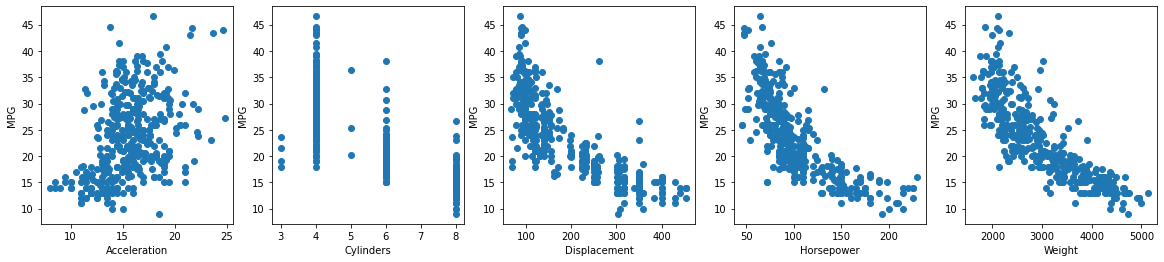

In [15]:
fig, axs = plt.subplots(1,5,figsize=(20,4))

axs[0].plot(data.Acceleration,data.MPG,'o')
axs[0].set_xlabel('Acceleration')
axs[0].set_ylabel('MPG')

axs[1].plot(data.Cylinders,data.MPG,'o')
axs[1].set_xlabel('Cylinders')
axs[1].set_ylabel('MPG')

axs[2].plot(data.Displacement,data.MPG,'o')
axs[2].set_xlabel('Displacement')
axs[2].set_ylabel('MPG')

axs[3].plot(data.Horsepower,data.MPG,'o')
axs[3].set_xlabel('Horsepower')
axs[3].set_ylabel('MPG')

axs[4].plot(data.Weight,data.MPG,'o')
axs[4].set_xlabel('Weight')
axs[4].set_ylabel('MPG')

####**2.4.4 Feature Scaling**

In [16]:
columns = ['Acceleration','Cylinders','Displacement','Horsepower','Weight']
data[columns] = data[columns].apply(FeatureScale)
print(data)

     Acceleration  Cylinders  Displacement  Horsepower    Weight   MPG
0       -1.285258   1.483947      1.077290    0.664133  0.620540  18.0
1       -1.466724   1.483947      1.488732    1.574594  0.843334  15.0
2       -1.648189   1.483947      1.182542    1.184397  0.540382  18.0
3       -1.285258   1.483947      1.048584    1.184397  0.536845  16.0
4       -1.829655   1.483947      1.029447    0.924265  0.555706  17.0
..            ...        ...           ...         ...       ...   ...
387      0.021294  -0.864014     -0.520637   -0.480448 -0.221125  27.0
388      3.287676  -0.864014     -0.932079   -1.364896 -0.999134  44.0
389     -1.430430  -0.864014     -0.568479   -0.532474 -0.804632  32.0
390      1.110088  -0.864014     -0.712005   -0.662540 -0.415627  28.0
391      1.400433  -0.864014     -0.721574   -0.584501 -0.303641  31.0

[392 rows x 6 columns]


####**2.4.5 Adding the bias column**

Let's add the column corresponding to the coefficient of $\theta_0$. We'll call this column the Bias column, for reasons that will be obvious later when we discuss neural networks. The values of this column, $x_0$, are all ones. It needs to have the same number of rows as the variable cars_clean_data. 

In [17]:
data.insert(loc=0,column='Bias',value=1)
print(data)

     Bias  Acceleration  Cylinders  Displacement  Horsepower    Weight   MPG
0       1     -1.285258   1.483947      1.077290    0.664133  0.620540  18.0
1       1     -1.466724   1.483947      1.488732    1.574594  0.843334  15.0
2       1     -1.648189   1.483947      1.182542    1.184397  0.540382  18.0
3       1     -1.285258   1.483947      1.048584    1.184397  0.536845  16.0
4       1     -1.829655   1.483947      1.029447    0.924265  0.555706  17.0
..    ...           ...        ...           ...         ...       ...   ...
387     1      0.021294  -0.864014     -0.520637   -0.480448 -0.221125  27.0
388     1      3.287676  -0.864014     -0.932079   -1.364896 -0.999134  44.0
389     1     -1.430430  -0.864014     -0.568479   -0.532474 -0.804632  32.0
390     1      1.110088  -0.864014     -0.712005   -0.662540 -0.415627  28.0
391     1      1.400433  -0.864014     -0.721574   -0.584501 -0.303641  31.0

[392 rows x 7 columns]


####**2.4.6 Implementation of the Gradient Descent Method**

We now define an inital value for the parameter, $\theta$. We also set the first six columns as the input data set and the last column as the expected output. Furthermore, let's define the options for the gradient descent, i.e. the learning rate and the number of epochs.<br>
Let's run the function $gradient\_descent$. This function first solves for the gradient based on the parameter, $\theta$, and then uses this gradient to obtain new values of the $\theta$. It does this for several epochs. The final value of  after all epochs is assigned to the variable $opt\_theta$ and displayed. Finally, the cost function per epoch is also displayed.

In [18]:
theta = np.array([[20],[1],[-1],[2],[3],[0.1]])
X = data[data.columns[0:6]].to_numpy()
y = data[data.columns[6:]].to_numpy()
epochs = 5000
learning_rate = np.array([0.001])

[opt_theta,Jcost] = gradient_descent(X,y,theta,learning_rate,epochs)
print(opt_theta)

[[-0.02318359]
 [ 0.09034734]
 [-0.19530804]
 [-0.04469356]
 [ 0.18389666]
 [ 0.12106275]]


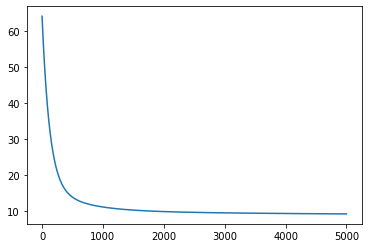

In [19]:
plt.plot(Jcost)

####**2.4.7 Expected Result**

We solve for the expected result for $\theta$ using the $LinearRegression$ function from the $sklearn module$.

In [20]:
model = linear_model.LinearRegression()
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

[23.44591837]
[[ 0.         -0.08019347 -0.67791319 -0.00868797 -1.73977416 -4.40015767]]


####**2.4.8 Implementation using Machine Learning**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(128, activation="tanh", input_dim=6, kernel_initializer="uniform"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, y, epochs=100, batch_size=10,  verbose=0)

plt.plot(history.history['loss'])